In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('attention')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,subject,attention,solutions,score
0,1,divided,1,2.0
1,2,divided,1,3.0
2,3,divided,1,3.0
3,4,divided,1,5.0
4,5,divided,1,4.0


In [3]:
df.describe()

,subject,solutions,score
count,60.000000,60.000000,60.000000
mean,10.500000,2.000000,5.958333
std,5.814943,0.823387,1.621601
min,1.000000,1.000000,2.000000
25%,5.750000,1.000000,5.000000
50%,10.500000,2.000000,6.000000
75%,15.250000,3.000000,7.000000
max,20.000000,3.000000,9.000000


In [4]:
df['attention'].unique()

array(['divided', 'focused'], dtype=object)

In [8]:
mask_div = (df['attention']=='divided')
mask_foc = (df['attention']=='focused')
df.loc[mask_div, 'attention'] = 0
df.loc[mask_foc, 'attention'] = 1
df

,subject,attention,solutions,score
0,1,0,1,2.0
1,2,0,1,3.0
2,3,0,1,3.0
3,4,0,1,5.0
4,5,0,1,4.0
5,6,0,1,5.0
6,7,0,1,5.0
7,8,0,1,5.0
8,9,0,1,2.0
9,10,0,1,6.0


In [11]:
df = df.astype({'attention': 'int16'})
df.dtypes

subject        int64
attention      int16
solutions      int64
score        float64
dtype: object

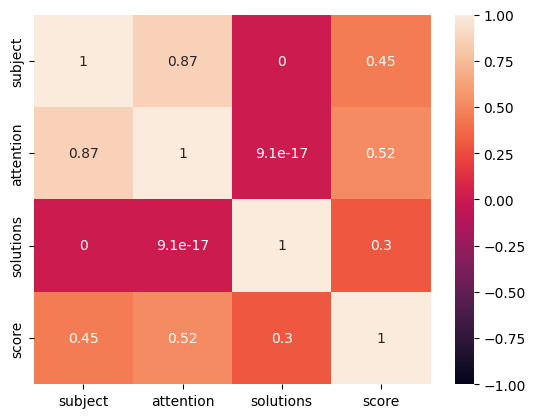

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
x,xt,y,yt =train_test_split(df.drop(columns="attention"),df.attention,test_size=.10,random_state=42)

In [15]:
lr=LogisticRegression()

In [16]:
lr.fit(x,y)
res=lr.predict(xt)
res

array([0, 0, 1, 0, 1, 1], dtype=int16)

In [17]:
lr.score(x,y) #training quality

1.0

In [18]:
lr.score(xt,yt) # accuracy_score is used at the back

1.0

In [19]:
accuracy_score(yt,res)

1.0